In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('../content/drive/MyDrive/project_3/Data/cleaned_combined_df.csv')

In [4]:
df['subreddit'] = df['subreddit'].map({1:'disneyparks', 0:'universalstudios'})

In [5]:
df.head()

,name,subreddit,title,selftext,upvote_ratio,num_comments,created_utc,year,month,title_len,selftext_len,title_word_count,selftext_word_count,title_selftext,subreddit_title_selftext,title_selftext_len,title_selftext_word_count
0,t3_1brgdb7,disneyparks,My friends just went to MK for the first time ...,Quote: “I was disappointed in Gaston’s Tavern....,0.10,3,2024-03-30,2024,3,93,455,19,84,friend magic kingdom first time disappointed r...,__label__1 friend magic kingdom first time dis...,455,43
1,t3_1br7ntk,disneyparks,"D23 Parks Bingo sheet, do you think the option...",,0.83,7,2024-03-30,2024,3,67,1,12,0,park bingo sheet think option varying enough,__label__1 park bingo sheet think option varyi...,1,7
2,t3_1bqyshu,disneyparks,Olu Mel! 💚,,0.68,0,2024-03-29,2024,3,10,1,3,0,olu mel,__label__1 olu mel,1,2
3,t3_1bqd0kg,disneyparks,CookieAnn!! 🤎,,0.76,5,2024-03-29,2024,3,13,1,2,0,cookieann,__label__1 cookieann,1,1
4,t3_1bqcac7,disneyparks,Incredible parade video,The YouTube algorithm gave me this astonishing...,0.67,2,2024-03-29,2024,3,23,297,3,46,incredible parade video youtube algorithm gave...,__label__1 incredible parade video youtube alg...,297,28


### Colour Variables

In [6]:
disney_colour = '#12194A'
uss_colour = '#007b4a'
custom_palette = {'disneyparks': disney_colour, 'universalstudios': uss_colour}

In [7]:
def plot_barcharts(df_coef1, df_coef2, title=""):
    fig, axes = plt.subplots(nrows=1, ncols=2)
    fig.suptitle(title, y=0.93)

    plot1 = df_coef1.plot(kind='barh', y='value', x='feature_name',
                                                                     ax=axes[0], figsize=(10,8), label='_',
                                                                       fontsize=12, color=disney_colour);
    plot1.set_xlabel('Count', fontsize=12)
    plot1.set_ylabel('Words', fontsize=12)
    plot1.set_title('Disney Parks')

    plot2 = df_coef2.plot(kind='barh', y='value',
                                                                  x='feature_name', fontsize=12,
                                                             ax=axes[1], figsize=(10,8),label='_',
                                                                        color= uss_colour);

    plot2.set_xlabel('Count', fontsize=12)
    plot2.set_ylabel('Words', fontsize=12)
    plot2.set_title('Unverisal Studio')

    plt.subplots_adjust(wspace=0.8)
    plt.show()

In [8]:
#Count Vectorizing Lemmatized Tokens(1 ngram)

cvec1 = CountVectorizer(ngram_range=(1,1))

df_disneyland_cvec_1= pd.DataFrame(cvec1.fit_transform(df[df['subreddit'] == 'disneyparks']['title_selftext']).todense(), columns=cvec1.get_feature_names_out())
df_uss_cvec_1= pd.DataFrame(cvec1.fit_transform(df[df['subreddit'] == 'universalstudios' ]['title_selftext']).todense(), columns=cvec1.get_feature_names_out())
df_combined_cvec_1= pd.DataFrame(cvec1.fit_transform(df['title_selftext']).todense(), columns=cvec1.get_feature_names_out())



#Count Vectorizing Lemmatized Tokens(2 ngram)

cvec2 = CountVectorizer(ngram_range=(2,2))
df_disneyland_cvec_2= pd.DataFrame(cvec2.fit_transform(df[df['subreddit'] == 'disneyparks']['title_selftext']).todense(), columns=cvec2.get_feature_names_out())
df_uss_cvec_2= pd.DataFrame(cvec2.fit_transform(df[df['subreddit'] == 'universalstudios' ]['title_selftext']).todense(), columns=cvec2.get_feature_names_out())
df_combined_cvec_2= pd.DataFrame(cvec2.fit_transform(df['title_selftext']).todense(), columns=cvec2.get_feature_names_out())


In [9]:
# Features for 2 Ngram
df_combined_cvec_2.shape

(1990, 61878)

In [10]:
# Features for 1 Ngram
df_combined_cvec_1.shape

(1990, 8740)

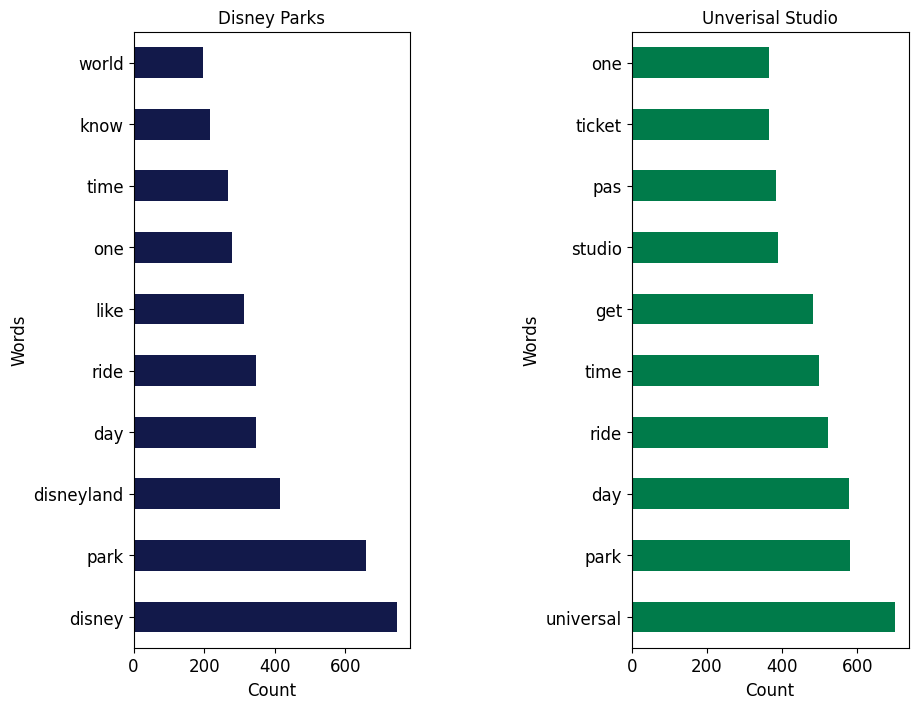

In [11]:
# Top 1 ngram word

plot_barcharts(df_disneyland_cvec_1.sum().sort_values(ascending=False).head(10), df_uss_cvec_1.sum().sort_values(ascending=False).head(10))


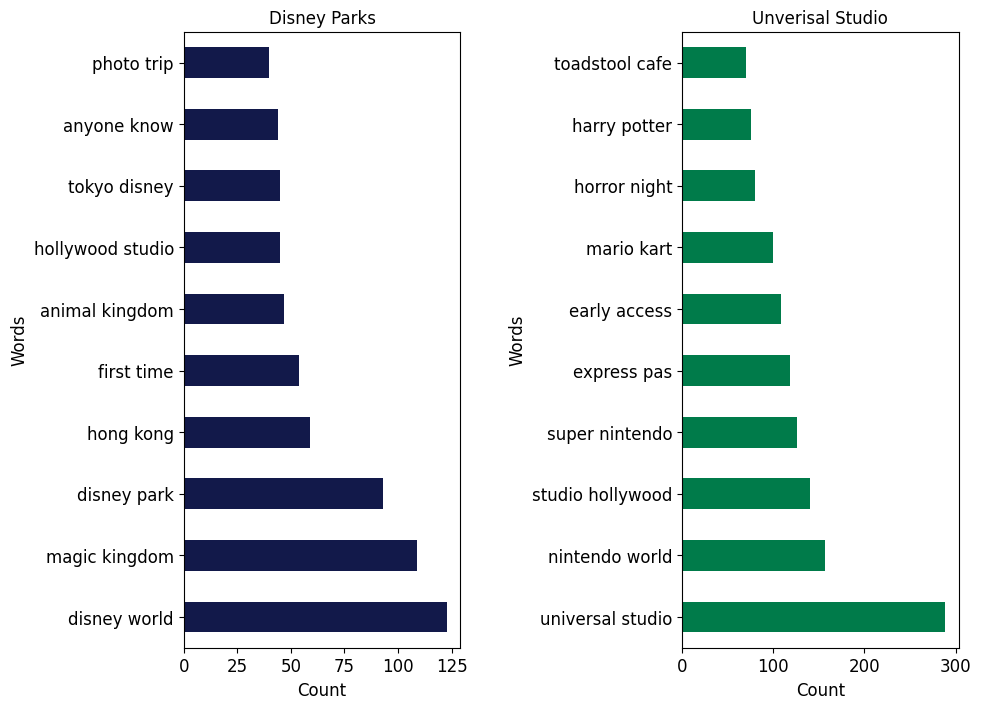

In [12]:
# Top 2 N gram words

plot_barcharts(df_disneyland_cvec_2.sum().sort_values(ascending=False).head(10), df_uss_cvec_2.sum().sort_values(ascending=False).head(10))

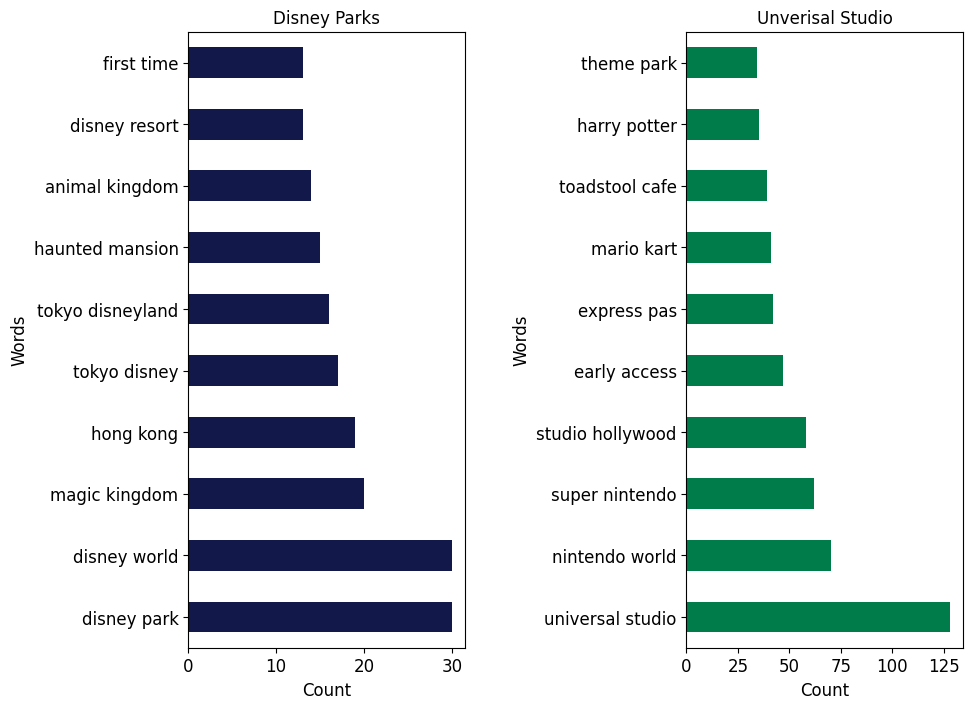

In [13]:
# Top 2 Ngram Words with upvote_ratio >=0.9

cvec2 = CountVectorizer(ngram_range=(2,2))

df_disneyland_cvec_upvote_ratio = pd.DataFrame(cvec2.fit_transform(df[(df['subreddit'] == 'disneyparks') & (df['upvote_ratio'] >= 0.9 )]['title_selftext']).todense(), columns=cvec2.get_feature_names_out())

df_uss_cvec_upvote_ratio = pd.DataFrame(cvec2.fit_transform(df[(df['subreddit'] == 'universalstudios') & (df['upvote_ratio'] >= 0.9)]['title_selftext']).todense(), columns=cvec2.get_feature_names_out())

plot_barcharts(df_disneyland_cvec_upvote_ratio.sum().sort_values(ascending=False).head(10), df_uss_cvec_upvote_ratio.sum().sort_values(ascending=False).head(10))

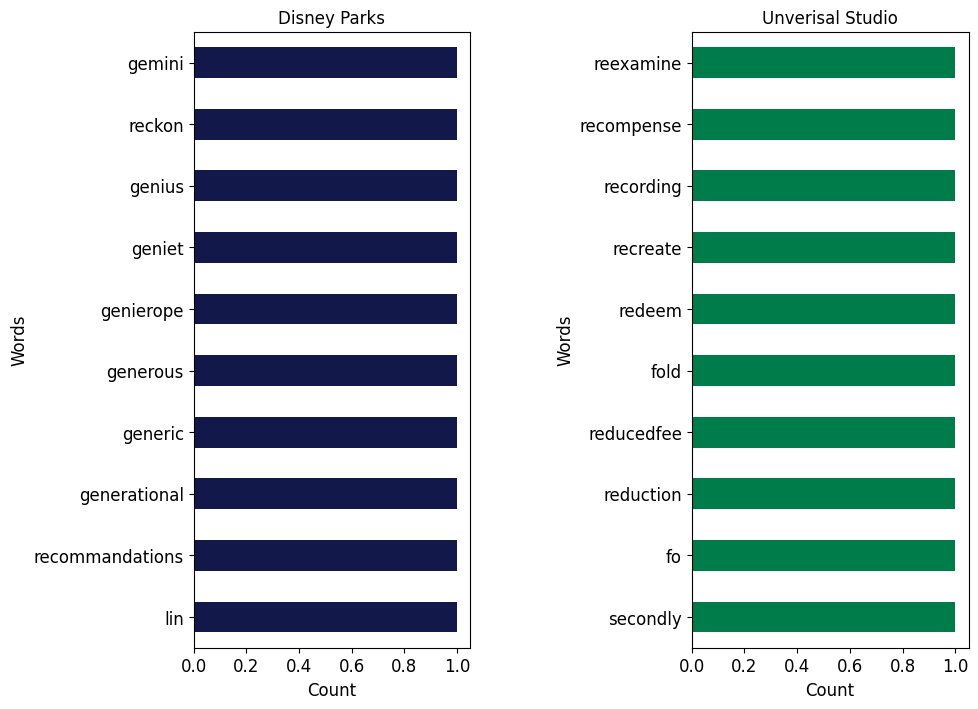

In [14]:
# Bottom used 10 words
plot_barcharts(df_disneyland_cvec_1.sum().sort_values(ascending=True).head(10), df_uss_cvec_1.sum().sort_values(ascending=True).head(10))

It make more sense to use ngram = 2 or 3 than 1 for model training later on.

### Find Top Common words

In [15]:
disneyland_features = set(df_disneyland_cvec_1)
uss_features = set(df_uss_cvec_1)

# Find common words
common_words = disneyland_features.intersection(uss_features)

# Initialize dictionaries to store counts
disneyland_word_counts = {}
uss_word_counts = {}
combined_word_counts = {}

# Iterate through common words and count occurrences in each DataFrame
for word in common_words:
    disneyland_word_counts[word] = df_disneyland_cvec_1[word].sum()
    uss_word_counts[word] = df_uss_cvec_1[word].sum()
    combined_word_counts[word] = df_combined_cvec_1[word].sum()


# Create a DataFrame to display counts
common_words_df = pd.DataFrame({
    'Word': list(common_words),
    'Disneyland_Count': [disneyland_word_counts[word] for word in common_words],
    'USS_Count': [uss_word_counts[word] for word in common_words],
    'Combined_Count': [combined_word_counts[word] for word in common_words]
})

common_words_df.sort_values(by= 'Combined_Count', ascending=False).head(10)

,Word,Disneyland_Count,USS_Count,Combined_Count
2114,park,660,580,1240
1915,day,348,578,926
1590,ride,348,522,870
1043,disney,747,37,784
694,time,267,499,766
1190,universal,34,701,735
68,get,194,481,675
1309,one,278,365,643
2243,like,314,305,619
1276,ticket,131,365,496


In [16]:
disneyland_features = set(df_disneyland_cvec_2)
uss_features = set(df_uss_cvec_2)

# Find common words
common_words = disneyland_features.intersection(uss_features)

# Initialize dictionaries to store counts
disneyland_word_counts = {}
uss_word_counts = {}
combined_word_counts = {}

# Iterate through common words and count occurrences in each DataFrame
for word in common_words:
    disneyland_word_counts[word] = df_disneyland_cvec_2[word].sum()
    uss_word_counts[word] = df_uss_cvec_2[word].sum()
    combined_word_counts[word] = df_combined_cvec_2[word].sum()


# Create a DataFrame to display counts
common_words_df = pd.DataFrame({
    'Word': list(common_words),
    'Disneyland_Count': [disneyland_word_counts[word] for word in common_words],
    'USS_Count': [uss_word_counts[word] for word in common_words],
    'Combined_Count': [combined_word_counts[word] for word in common_words]
})

common_words_df.sort_values(by= 'Combined_Count', ascending=False).head(20)

,Word,Disneyland_Count,USS_Count,Combined_Count
667,universal studio,7,289,296
2216,studio hollywood,1,140,141
414,disney world,123,2,125
2359,first time,54,63,117
1910,magic kingdom,109,4,113
1985,early access,2,109,111
1879,anyone know,44,63,107
348,one day,36,63,99
1077,disney park,93,2,95
424,theme park,25,52,77


### Distribution of numical variables

In [17]:
def plot_histplot(df_1, df_2,x, title=""):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
    fig.suptitle(title, y=0.93)

    plot1 = sns.histplot(data=df_1, x= x, kde=True,
                        ax=axes[0], color= disney_colour)
    plot1.set_xlabel(x)
    plot1.set_ylabel('Frequency')
    plot1.set_title('Disneyland')


    plot2 = sns.histplot(data=df_2, x= x, kde=True,
                        ax=axes[1], color= uss_colour)
    plot2.set_xlabel(x)
    plot2.set_ylabel('Frequency')
    plot2.set_title('Universal Studios')

    plt.subplots_adjust(wspace=0.4)
    plt.show()

### selftext word count

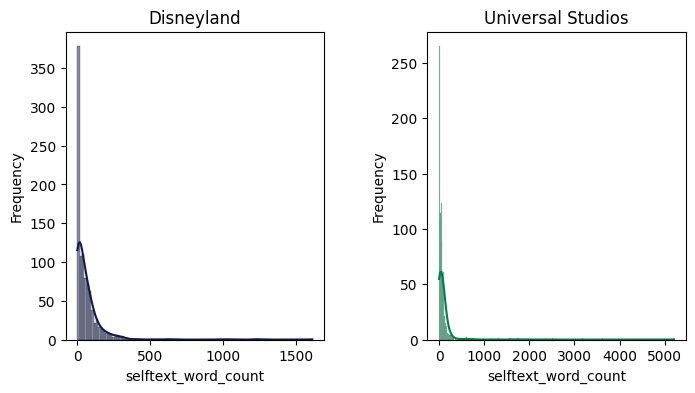

In [18]:
disney_df = df[df['subreddit']== 'disneyparks']
uss_df = df[df['subreddit']== 'universalstudios']

plot_histplot(disney_df,uss_df,'selftext_word_count')

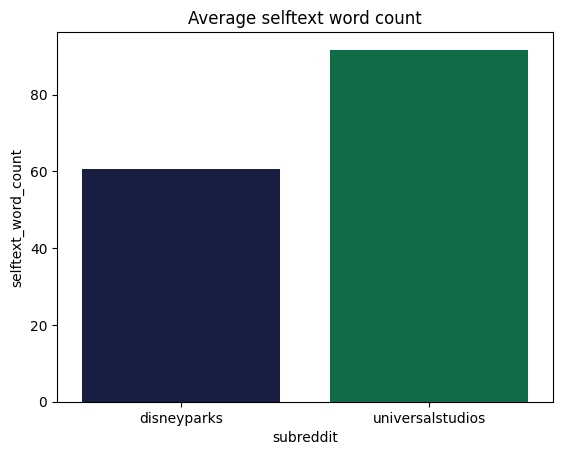

In [19]:
posts_df_avg = df.groupby(['subreddit']).agg({'selftext_word_count': 'mean'}).reset_index()
sns.barplot(data=posts_df_avg, x='subreddit', y = 'selftext_word_count', hue= 'subreddit',  palette=custom_palette)
plt.title(f'Average selftext word count')
plt.show()

There are more training words for universal studios as compared to disney parks

### Num of comments

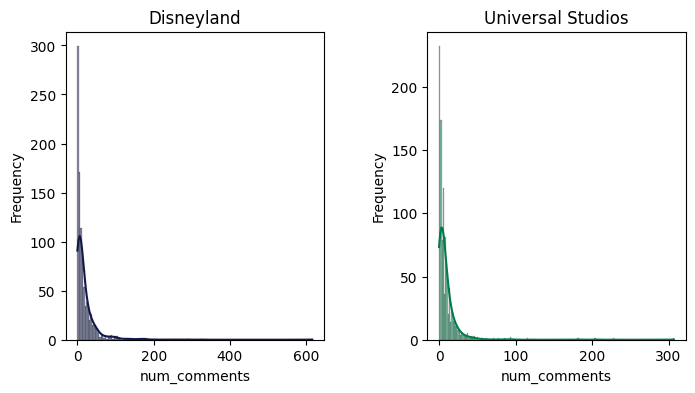

In [20]:
plot_histplot(disney_df,uss_df,'num_comments')

### Posts by Year and by subreddit

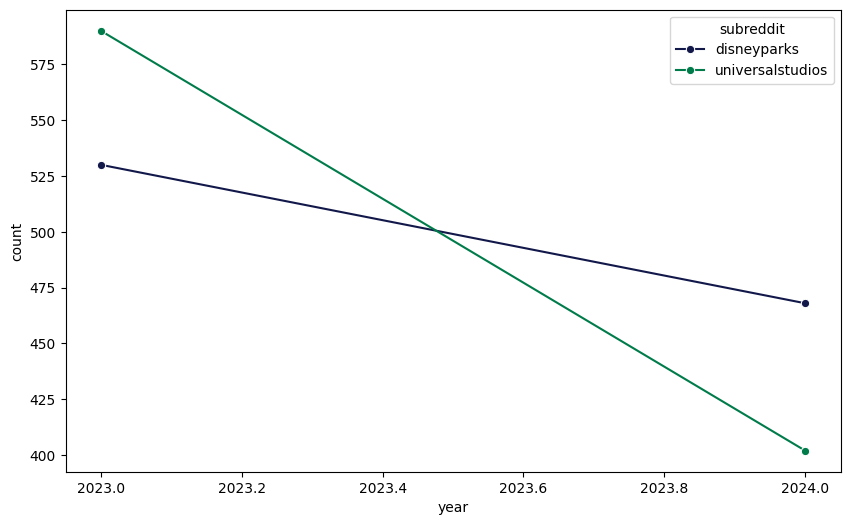

In [21]:
fig, ax1 = plt.subplots(figsize=(10, 6))


posts_df = df.groupby(['year','subreddit']).size().reset_index(name='count')
sns.lineplot(x="year", y="count", hue = 'subreddit', palette=custom_palette, marker = 'o' , data =posts_df )

plt.show()

### Posts by month and by subreddit

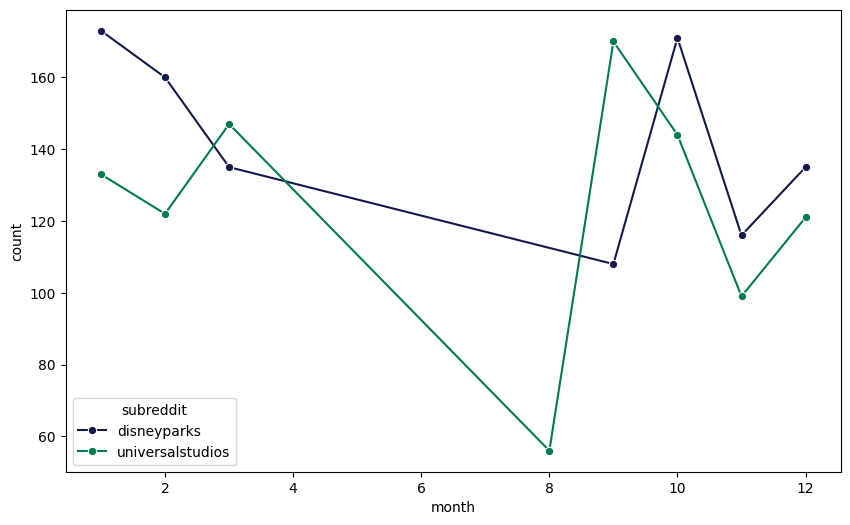

In [22]:
fig, ax1 = plt.subplots(figsize=(10, 6))


posts_df = df.groupby(['year','month','subreddit']).size().reset_index(name='count')
posts_df_avg = posts_df.groupby(['month','subreddit']).agg({'count': 'mean'}).reset_index()

sns.lineplot(x="month", y="count", hue = 'subreddit', palette=custom_palette, marker = 'o' , data =posts_df_avg )

plt.show()